In [76]:
!pip install pycep-correios --quiet
!pip install geopandas --quiet
!pip install geopy

Defaulting to user installation because normal site-packages is not writeable


In [77]:
import pandas as pd
import pycep_correios
from geopy.geocoders import Nominatim
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl


from geopy.extra.rate_limiter import RateLimiter

In [78]:
!pip install --upgrade pandas --quiet

# SUPORT FUNCTIONS

In [79]:
def readDB(folder,file):
    df = pd.read_csv(f'{folder}/casos_coronavirus_{file}_1.csv', sep=',', low_memory=False)
    df2 = pd.read_csv(f'{folder}/casos_coronavirus_{file}_2.csv', sep=',', low_memory=False)
    df3 = pd.read_csv(f'{folder}/casos_coronavirus_{file}_3.csv', sep=',', low_memory=False)
    df4 = pd.read_csv(f'{folder}/casos_coronavirus_{file}_4.csv', sep=',', low_memory=False)
    df5 = pd.read_csv(f'{folder}/casos_coronavirus_{file}_5.csv', sep=',', low_memory=False)
    df6 = pd.read_csv(f'{folder}/casos_coronavirus_{file}_6.csv', sep=',', low_memory=False)
    df7 = pd.read_csv(f'{folder}/casos_coronavirus_{file}_7.csv', sep=',', low_memory=False)
    df8 = pd.read_csv(f'{folder}/casos_coronavirus_{file}_8.csv', sep=',', low_memory=False)
    df9 = pd.read_csv(f'{folder}/casos_coronavirus_{file}_9.csv', sep=',', low_memory=False)
    df_database = pd.concat([df, df2, df3, df4, df5, df6, df7, df8, df9])
    return df_database

In [80]:
def organize_table(df):
    df_final = df[['rownum','identificadorCaso','classificacaoEstadoEsus','classificacaoFinalEsus','evolucaoCasoEsus','profissionalSaudeEsus','paisCaso','estadoCaso','codigoMunicipioCaso','municipioCaso','bairroCaso','bairroCasoGeocoder','sexoCaso','idadeCaso','faixaEtaria','dataNascimento','dataNotificacao','dataInicioSintomas','dataSolicitacaoExame','dataColetaExame','dataResultadoExame','resultadoFinalExame','laboratorioExame','dataInternacaoSivep','dataEntradaUTISivep','dataSaidaUTISivep','evolucaoCasoSivep','dataEvolucaoCasoSivep','comorbidadePuerperaSivep','comorbidadeCardiovascularSivep','comorbidadeHematologiaSivep','comorbidadeSindromeDownSivep','comorbidadeHepaticaSivep','comorbidadeAsmaSivep','comorbidadeDiabetesSivep','comorbidadeNeurologiaSivep','comorbidadePneumopatiaSivep','comorbidadeImunodeficienciaSivep','comorbidadeRenalSivep','comorbidadeObesidadeSivep','tipoTesteExame','requisicaoGal','racaCor','dataNotificacaoObito','municipioNotificacaoEsus','classificacaoFinalCasoSivep','gestante','tipoTesteEsus','obitoConfirmado','dataObito','classificacaoObito','localObito','tipoLocalObito']]
    df_final = df_final.dropna(subset=['identificadorCaso'])
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['BARRA'],'BARRA DO CEARA')
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['JD GUANABARA','J GUANABARA','GUANABARA'],'JARDIM GUANABARA')
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['QUITINO CUNHA','QUINTINO','Q CUNHA'],'QUINTINO CUNHA')
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['SAPIRANGA','COITE'],'SAPIRANGA/COITE')
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['BOA VISTA','BOA VISTA / CASTELAO'],'CASTELAO')
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['SANTA MARIA','S MARIA','PS MARIA'],'PARQUE SANTA MARIA')
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['PARQUE PRESIDENTE VARGAS','VARGAS','P VARGAS','PRESIDENTE VARGAS'],'PARQUE PRES. VARGAS')
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['PARQUE SANTA ROSA','PS ROSA','S ROSA'],'PARQUE SANTA ROSA')
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['M DIAS BRANCO','MANOEL DIAS BRANCO','DIAS BRANCO'],'MANUEL DIAS BRANCO')
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['BOM SUCESSO','BOMSUCESSO'],'BONSUCESSO')
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['MANUEL SATIRO','MANOEL SATIRO','SATIRO'],'VILA MANOEL SATIRO')
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['JOQUEI'],'JOQUEI CLUBE')
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['PANAMERICANO'],'PAN AMERICANO')  
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['TAUAPE'],'SAO JOAO DO TAUAPE')  
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['MONDUBIM'],'MONDUBIM I')  
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['NOVO MONDUBIM'],'MONDUBIM II')  
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['VICENTE PINZON'],'VICENTE PIZON')  
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['ELLERY'],'VILA ELLERY')  
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['ENGENHEIRO LUCIANO CAVALCANTE'],'LUCIANO CAVALCANTE')  
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['JOSE WALTER'],'PREFEITO JOSE WALTER')  
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['CONJUNTO PALMEIRAS'],'PALMEIRAS')  
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['VILA PERI'],'VILA PERY')  
    df_final['bairroCaso'] = df_final['bairroCaso'].replace(['JOSE DE ALENCAR'],'ALAGADICO NOVO')
    return df_final

In [81]:
def define_neighborhoods(df):
    df_fortaleza = df[(df['bairroCaso'] == 'JARDIM GUANABARA') | (df['bairroCaso'] ==  'VILA VELHA') | (df['bairroCaso'] ==  'BARRA DO CEARA') | (df['bairroCaso'] ==  'CRISTO REDENTOR') | (df['bairroCaso'] ==  'PIRAMBU') | (df['bairroCaso'] ==  'CARLITO PAMPLONA') | (df['bairroCaso'] ==  'JACARECANGA') | (df['bairroCaso'] ==  'ALVARO WEYNE') | (df['bairroCaso'] ==  'FLORESTA') | (df['bairroCaso'] ==  'JARDIM IRACEMA') | (df['bairroCaso'] ==  'ALDEOTA') | (df['bairroCaso'] ==  'MEIRELES') | (df['bairroCaso'] ==  'DE LOURDES') | (df['bairroCaso'] ==  'PAPICU') | (df['bairroCaso'] ==  'VARJOTA') | (df['bairroCaso'] ==  'CAIS DO PORTO') | (df['bairroCaso'] ==  'MUCURIPE') | (df['bairroCaso'] ==  'VICENTE PIZON') | (df['bairroCaso'] ==  'DIONISIO TORRES') | (df['bairroCaso'] ==  'JOAQUIM TAVORA') | (df['bairroCaso'] ==  'SAO JOAO DO TAUAPE') | (df['bairroCaso'] ==  'ANTONIO BEZERRA') | (df['bairroCaso'] ==  'OLAVO OLIVEIRA') | (df['bairroCaso'] ==  'QUINTINO CUNHA') | (df['bairroCaso'] ==  'PADRE ANDRADE') | (df['bairroCaso'] ==  'PRESIDENTE KENNEDY') | (df['bairroCaso'] ==  'VILA ELLERY') | (df['bairroCaso'] ==  'FARIAS BRITO') | (df['bairroCaso'] ==  'MONTE CASTELO') | (df['bairroCaso'] ==  'SAO GERARDO') | (df['bairroCaso'] ==  'AMADEU FURTADO') | (df['bairroCaso'] ==  'PARQUE ARAXA') | (df['bairroCaso'] ==  'PARQUELANDIA') | (df['bairroCaso'] ==  'RODOLFO TEOFILO') | (df['bairroCaso'] ==  'BENFICA') | (df['bairroCaso'] ==  'FATIMA') | (df['bairroCaso'] ==  'JOSE BONIFACIO') | (df['bairroCaso'] ==  'BOM FUTURO') | (df['bairroCaso'] ==  'DAMAS') | (df['bairroCaso'] ==  'JARDIM AMERICA') | (df['bairroCaso'] ==  'MONTESE') | (df['bairroCaso'] ==  'ITAOCA') | (df['bairroCaso'] ==  'PARANGABA') | (df['bairroCaso'] ==  'VILA PERY') | (df['bairroCaso'] ==  'AEROPORTO') | (df['bairroCaso'] ==  'PARREAO') | (df['bairroCaso'] ==  'VILA UNIAO') | (df['bairroCaso'] ==  'BOM JARDIM') | (df['bairroCaso'] ==  'BONSUCESSO') | (df['bairroCaso'] ==  'GRANJA LISBOA') | (df['bairroCaso'] ==  'GRANJA PORTUGAL') | (df['bairroCaso'] ==  'SIQUEIRA') | (df['bairroCaso'] ==  'AEROLANDIA') | (df['bairroCaso'] ==  'ALTO DA BALANCA') | (df['bairroCaso'] ==  'CIDADE DOS FUNCIONARIOS') | (df['bairroCaso'] ==  'JARDIM DAS OLIVEIRAS') | (df['bairroCaso'] ==  'PARQUE MANIBURA') | (df['bairroCaso'] ==  'CAMBEBA') | (df['bairroCaso'] ==  'MESSEJANA') | (df['bairroCaso'] ==  'PARQUE IRACEMA') | (df['bairroCaso'] ==  'CURIO') | (df['bairroCaso'] ==  'GUAJERU') | (df['bairroCaso'] ==  'ALAGADICO NOVO') | (df['bairroCaso'] ==  'LAGOA REDONDA') | (df['bairroCaso'] ==  'COACU') | (df['bairroCaso'] ==  'PAUPINA') | (df['bairroCaso'] ==  'SAO BENTO') | (df['bairroCaso'] ==  'PRAIA DO FUTURO I') | (df['bairroCaso'] ==  'PRAIA DO FUTURO II') | (df['bairroCaso'] ==  'CIDADE 2000') | (df['bairroCaso'] ==  'COCO') | (df['bairroCaso'] ==  'MANUEL DIAS BRANCO') | (df['bairroCaso'] ==  'LUCIANO CAVALCANTE') | (df['bairroCaso'] ==  'GUARARAPES') | (df['bairroCaso'] ==  'SALINAS') | (df['bairroCaso'] ==  'EDSON QUEIROZ') | (df['bairroCaso'] ==  'SABIAGUABA') | (df['bairroCaso'] ==  'SAPIRANGA/COITE') | (df['bairroCaso'] ==  'DENDE') | (df['bairroCaso'] ==  'ITAPERI') | (df['bairroCaso'] ==  'SERRINHA') | (df['bairroCaso'] ==  'CASTELAO') | (df['bairroCaso'] ==  'DIAS MACEDO') | (df['bairroCaso'] ==  'PARQUE DOIS IRMAOS') | (df['bairroCaso'] ==  'PASSARE') | (df['bairroCaso'] ==  'PREFEITO JOSE WALTER') | (df['bairroCaso'] ==  'PLANALTO AYRTON SENNA') | (df['bairroCaso'] ==  'BARROSO') | (df['bairroCaso'] ==  'CAJAZEIRAS') | (df['bairroCaso'] ==  'PALMEIRAS') | (df['bairroCaso'] ==  'JANGURUSSU') | (df['bairroCaso'] ==  'ANCURI') | (df['bairroCaso'] ==  'PEDRAS') | (df['bairroCaso'] ==  'PARQUE SANTA MARIA') | (df['bairroCaso'] ==  'ARACAPE') | (df['bairroCaso'] ==  'CANINDEZINHO') | (df['bairroCaso'] ==  'CONJUNTO ESPERANCA') | (df['bairroCaso'] ==  'MONDUBIM II') | (df['bairroCaso'] ==  'PARQUE SANTA ROSA') | (df['bairroCaso'] ==  'PARQUE SAO JOSE') | (df['bairroCaso'] ==  'PARQUE PRES. VARGAS') | (df['bairroCaso'] ==  'JARDIM CEARENSE') | (df['bairroCaso'] ==  'MARAPONGA') | (df['bairroCaso'] ==  'MONDUBIM I') | (df['bairroCaso'] ==  'VILA MANOEL SATIRO') | (df['bairroCaso'] ==  'BELA VISTA') | (df['bairroCaso'] ==  'COUTO FERNANDES') | (df['bairroCaso'] ==  'DEMOCRITO ROCHA') | (df['bairroCaso'] ==  'PAN AMERICANO') | (df['bairroCaso'] ==  'PICI') | (df['bairroCaso'] ==  'AUTRAN NUNES') | (df['bairroCaso'] ==  'DOM LUSTOSA') | (df['bairroCaso'] ==  'HENRIQUE JORGE') | (df['bairroCaso'] ==  'JOAO XXIII') | (df['bairroCaso'] ==  'JOQUEI CLUBE') | (df['bairroCaso'] ==  'CONJUNTO CEARA I') | (df['bairroCaso'] ==  'CONJUNTO CEARA II') | (df['bairroCaso'] ==  'GENIBAU') | (df['bairroCaso'] ==  'CENTRO') | (df['bairroCaso'] ==  'MOURA BRASIL') | (df['bairroCaso'] ==  'PRAIA DE IRACEMA')] 
    df_fortaleza = df_fortaleza[df_fortaleza['municipioCaso']=='FORTALEZA']
    return df_fortaleza

In [82]:
def get_positive(df):
    df_fortaleza_positive = df[((df['resultadoFinalExame'] == 'Positivo') | (df['resultadoFinalExame'] == 'Provável')) & df['profissionalSaudeEsus'] == False]
#     df_fortaleza_positive = df[df['profissionalSaudeEsus'] == True]
    df_fortaleza_positive['valid'] = 1
    df_fortaleza_positive = df_fortaleza_positive[df_fortaleza_positive['municipioCaso']=='FORTALEZA']
    return df_fortaleza_positive

In [83]:
def get_case(df):
    df_casos = df.groupby(['bairroCaso']).sum()
    df_casos = df_casos.reset_index()
    df_casos = df_casos[['bairroCaso','valid']]
    return df_casos

In [84]:
nb = 'BAIRROS_DE_FORTALEZA_SHAPEFILE/bairrosFortaleza.shp'
regions = gpd.read_file(nb)

In [85]:
def merge_geometry(df):
    df = pd.DataFrame(df)
    merged = regions.set_index('Name').join(df.set_index('bairroCaso'))
    merged = merged.reset_index()
    merged = merged.fillna(0)
    merged = merged[['Name', 'geometry', 'valid']]
    return merged

In [86]:
# def merge_betweennes_and_clustering(df):
#     betweenness_bairros = ['JARDIM CEARENSE', 'MOURA BRASIL', 'CAIS DO PORTO', 'PRAIA DE IRACEMA', 'CONJUNTO PALMEIRAS', 'CIDADE 2000', 'GUARARAPES', 'SAO BENTO', 'QUINTINO CUNHA', 'CONJUNTO CEARA I', 'VILA UNIAO', 'JARDIM GUANABARA', 'VILA VELHA', 'JOAO XXIII', 'PANAMERICANO', 'GRANJA LISBOA', 'COUTO FERNANDES', 'SIQUEIRA', 'PRESIDENTE VARGAS', 'PARQUE SANTA ROSA', 'BOM FUTURO', 'DIONISIO TORRES', 'CONJUNTO CEARA II', 'PRAIA DO FUTURO I', 'PEDRAS', 'ANCURI', 'CURIO', 'GUAJERU', 'AUTRAN NUNES', 'PARQUE SANTA MARIA', 'DENDE', 'ALTO DA BALANCA', 'BARRA DO CEARA', 'JARDIM AMERICA', 'JOSE BONIFACIO', 'AMADEU FURTADO', 'VILA PERI', 'PARQUE SAO JOSE', 'PLANALTO AYRTON SENNA', 'CRISTO REDENTOR', 'PARQUE IRACEMA', 'PRAIA DO FUTURO II', 'PARQUE DOIS IRMAOS', 'CONJUNTO ESPERANCA', 'PARQUE ARAXA', 'ENGENHEIRO LUCIANO CAVALCANTE', 'ARACAPE', 'JOSE DE ALENCAR', 'DOM LUSTOSA', 'PARREAO', 'PIRAMBU', 'PARQUE MANIBURA', 'DE LOURDES', 'MUCURIPE', 'PAUPINA', 'VICENTE PINZON', 'CIDADE DOS FUNCIONARIOS', 'NOVO MONDUBIM', 'RODOLFO TEOFILO', 'MONTE CASTELO', 'SABIAGUABA', 'PAPICU', 'MANUEL DIAS BRANCO', 'JARDIM IRACEMA', 'COACU', 'FLORESTA', 'CAMBEBA', 'BOM JARDIM', 'SAO GERARDO', 'CARLITO PAMPLONA', 'GRANJA PORTUGAL', 'BOA VISTA / CASTELAO', 'ALVARO WEYNE', 'LAGOA REDONDA', 'MANOEL SATIRO', 'MEIRELES', 'VARJOTA', 'DAMAS', 'ELLERY', 'JARDIM DAS OLIVEIRAS', 'HENRIQUE JORGE', 'BELA VISTA', 'GENIBAU', 'BARROSO', 'JOAQUIM TAVORA', 'SAPIRANGA / COITE', 'OLAVO OLIVEIRA', 'MARAPONGA', 'AEROLANDIA', 'PARQUELANDIA', 'ITAOCA', 'SALINAS', 'CANINDEZINHO', 'JACARECANGA', 'ALDEOTA', 'PRESIDENTE KENNEDY', 'JOSE WALTER', 'MONDUBIM', 'BENFICA', 'JANGURUSSU', 'FATIMA', 'PADRE ANDRADE', 'FARIAS BRITO', 'ITAPERI', 'DIAS MACEDO', 'DEMOCRITO ROCHA', 'CAJAZEIRAS', 'JOQUEI CLUBE', 'MESSEJANA', 'PASSARE', 'SERRINHA', 'COCO', 'EDSON QUEIROZ', 'MONTESE', 'CENTRO', 'BONSUCESSO', 'SAO JOAO DO TAUAPE', 'PICI', 'AEROPORTO', 'PARANGABA'] 
#     betweenness_bairros_value = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.121492664862555e-05, 0.0008037113150344882, 0.0009587707707633643, 0.0009662262439644577, 0.0010717620063363323, 0.001189395755277194, 0.0012048448469943356, 0.0012559013002185256, 0.001303377917984276, 0.0013825987903754598, 0.0015512287309488186, 0.0016416029688711643, 0.0016650941910519618, 0.0016983507375614524, 0.0017458273553272027, 0.0017948717321745918, 0.0018304791954989047, 0.0023796806858336554, 0.0027147673464856404, 0.0035469006538146864, 0.003557977723708088, 0.003882685927236531, 0.003935678858455443, 0.004222092248224877, 0.0043305845799446, 0.004722938128991906, 0.005069525196935965, 0.005324596793724509, 0.005387559104682259, 0.0056723272601899265, 0.005855562762572736, 0.007539825331431468, 0.008036807884247798, 0.008136563292498964, 0.00855827527853379, 0.008726139225878997, 0.00876961787005984, 0.008947872918252373, 0.0096460676377189, 0.010311409402232559, 0.010358471253632729, 0.010511768754813333, 0.01062702921608237, 0.011180326556971447, 0.011267412577777707, 0.011322735534680608, 0.01168454970255748, 0.012856032658146565, 0.01309505130341331, 0.013536310173691338, 0.01366460960453086, 0.01373943734887275, 0.013968981787236797, 0.013998798687468365, 0.014380516111910208, 0.014467420005325676, 0.01480055743544744, 0.0161572169974594, 0.016422158435658567, 0.017955427392353493, 0.01895694846440841, 0.02001423589634759, 0.02135213633594489, 0.021374613988905868, 0.02198272998171678, 0.022885938152640638, 0.02703473338425813, 0.027555816933021705, 0.02836629917474872, 0.029757575606413497, 0.032488983906240554, 0.03267078610524784, 0.03368744549585716, 0.0338689617307304, 0.03401555575935754, 0.03567563490604527, 0.037897208886659005, 0.03796095594050499, 0.040991384601131435, 0.04270706981630915, 0.044075309127027174, 0.04608048721822069, 0.05002050109015106, 0.05186427284906802, 0.054556227532296185, 0.05487654466002148, 0.05932156169439989, 0.06203694757587751, 0.06428682181944025, 0.06538824074086247, 0.06795792068544061, 0.06888585057817921, 0.0767015947391578, 0.07685288084906079, 0.07768481486783632, 0.07869197169066985, 0.08944398134639671, 0.08992762005856454, 0.09176079281643061, 0.09465473567866574, 0.10799317780687628, 0.11302558555757487, 0.1193977979615558, 0.12654300209714545, 0.12914044694125226, 0.14199260023569074, 0.18720476837269517, 0.19139975966031525, 0.22865175100735655]
#     clustering_bairros = ['CONJUNTO CEARA II', 'JARDIM IRACEMA', 'JOSE WALTER', 'CURIO', 'MUCURIPE', 'SAPIRANGA / COITE', 'JARDIM CEARENSE', 'DEMOCRITO ROCHA', 'MONDUBIM', 'JARDIM GUANABARA', 'OLAVO OLIVEIRA', 'MOURA BRASIL', 'GRANJA LISBOA', 'PARQUE MANIBURA', 'BARRA DO CEARA', 'ALTO DA BALANCA', 'FLORESTA', 'CAIS DO PORTO', 'DOM LUSTOSA', 'VARJOTA', 'EDSON QUEIROZ', 'PICI', 'DAMAS', 'ANCURI', 'PARQUE SANTA MARIA', 'PRAIA DO FUTURO II', 'JOSE DE ALENCAR', 'PEDRAS', 'SALINAS', 'PADRE ANDRADE', 'BOA VISTA / CASTELAO', 'DENDE', 'JOSE BONIFACIO', 'MARAPONGA', 'DE LOURDES', 'FARIAS BRITO', 'PRAIA DE IRACEMA', 'ALDEOTA', 'PRAIA DO FUTURO I', 'JACARECANGA', 'COCO', 'BELA VISTA', 'CRISTO REDENTOR', 'PRESIDENTE KENNEDY', 'FATIMA', 'VILA PERI', 'CONJUNTO PALMEIRAS', 'JOQUEI CLUBE', 'AMADEU FURTADO', 'CONJUNTO ESPERANCA', 'PARREAO', 'SABIAGUABA', 'PANAMERICANO', 'VILA VELHA', 'PARQUE SAO JOSE', 'GENIBAU', 'VICENTE PINZON', 'GRANJA PORTUGAL', 'CIDADE 2000', 'MANUEL DIAS BRANCO', 'BARROSO', 'PARQUELANDIA', 'BOM FUTURO', 'DIONISIO TORRES', 'BOM JARDIM', 'ALVARO WEYNE', 'MONTE CASTELO', 'SAO GERARDO', 'COACU', 'PLANALTO AYRTON SENNA', 'CIDADE DOS FUNCIONARIOS', 'ITAPERI', 'PRESIDENTE VARGAS', 'PARQUE SANTA ROSA', 'JARDIM DAS OLIVEIRAS', 'AUTRAN NUNES', 'SAO JOAO DO TAUAPE', 'PAPICU', 'GUARARAPES', 'PARQUE IRACEMA', 'CAJAZEIRAS', 'CANINDEZINHO', 'PARANGABA', 'PAUPINA', 'PARQUE ARAXA', 'RODOLFO TEOFILO', 'SAO BENTO', 'JOAO XXIII', 'NOVO MONDUBIM', 'GUAJERU', 'QUINTINO CUNHA', 'PASSARE', 'PARQUE DOIS IRMAOS', 'LAGOA REDONDA', 'PIRAMBU', 'MONTESE', 'DIAS MACEDO', 'JARDIM AMERICA', 'AEROPORTO', 'MESSEJANA', 'JANGURUSSU', 'CONJUNTO CEARA I', 'BENFICA', 'VILA UNIAO', 'CAMBEBA', 'HENRIQUE JORGE', 'COUTO FERNANDES', 'CARLITO PAMPLONA', 'MEIRELES', 'CENTRO', 'AEROLANDIA', 'ITAOCA', 'ENGENHEIRO LUCIANO CAVALCANTE', 'ELLERY', 'SERRINHA', 'MANOEL SATIRO', 'JOAQUIM TAVORA', 'SIQUEIRA', 'ARACAPE', 'BONSUCESSO'] 
#     clustering_bairros_value = [0.6666666666666666, 0.4666666666666667, 0.3333333333333333, 0.6666666666666666, 0.5, 0.4, 1.0, 0.38095238095238093, 0.26666666666666666, 0.8333333333333334, 0.4, 1.0, 0.5, 0.5, 0.5, 0.6666666666666666, 0.42857142857142855, 1.0, 0.5, 0.4666666666666667, 0.24444444444444444, 0.2222222222222222, 0.4, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.5, 0.6666666666666666, 0.35714285714285715, 0.3333333333333333, 0.6666666666666666, 0.6, 0.6666666666666666, 0.39285714285714285, 0.5333333333333333, 0.39285714285714285, 1.0, 0.38095238095238093, 0.6666666666666666, 0.3333333333333333, 0.28888888888888886, 0.3333333333333333, 0.6, 0.38095238095238093, 0.3333333333333333, 0.6, 1.0, 0.4, 0.6, 0.5, 0.4666666666666667, 0.6666666666666666, 0.6666666666666666, 0.6, 0.4666666666666667, 0.3333333333333333, 0.3333333333333333, 0.4666666666666667, 1.0, 0.42857142857142855, 0.47619047619047616, 0.47619047619047616, 0.6666666666666666, 0.6666666666666666, 0.4666666666666667, 0.47619047619047616, 0.5, 0.4666666666666667, 0.4, 0.6666666666666666, 0.4, 0.39285714285714285, 0.6666666666666666, 0.6666666666666666, 0.4666666666666667, 0.6666666666666666, 0.32142857142857145, 0.5333333333333333, 1.0, 0.6, 0.3611111111111111, 0.2857142857142857, 0.26666666666666666, 0.3333333333333333, 0.6, 0.47619047619047616, 1.0, 0.6666666666666666, 0.4666666666666667, 0.6666666666666666, 1.0, 0.4166666666666667, 0.5, 0.3333333333333333, 0.6666666666666666, 0.26666666666666666, 0.4642857142857143, 0.5, 0.24444444444444444, 0.21818181818181817, 0.2857142857142857, 1.0, 0.32142857142857145, 1.0, 0.4, 0.4, 0.6666666666666666, 0.4666666666666667, 0.4, 0.2222222222222222, 0.4666666666666667, 0.6, 0.4666666666666667, 0.3333333333333333, 0.47619047619047616, 0.5333333333333333, 0.4, 0.6666666666666666, 0.4, 0.2777777777777778]

#     d = {
#         "betweenness": pd.Series(betweenness_bairros_value, index=betweenness_bairros),
#         "clustering": pd.Series(clustering_bairros_value, index=clustering_bairros),
#         }
#     table = pd.DataFrame(d)
#     table = table.reset_index()
#     merged = df.set_index('Name').join(table.set_index('index'))
#     merged = merged.reset_index()
#     merged = merged.fillna(0)
#     return merged

In [87]:
def merge_population(df):
    population_bairros = ['JARDIM GUANABARA','VILA VELHA','BARRA DO CEARA','CRISTO REDENTOR','PIRAMBU','CARLITO PAMPLONA','JACARECANGA','ALVARO WEYNE','FLORESTA','JARDIM IRACEMA','ALDEOTA','MEIRELES','DE LOURDES','PAPICU','VARJOTA','CAIS DO PORTO','MUCURIPE','VICENTE PIZON','DIONISIO TORRES','JOAQUIM TAVORA','SAO JOAO DO TAUAPE','ANTONIO BEZERRA','OLAVO OLIVEIRA','QUINTINO CUNHA','PADRE ANDRADE','PRESIDENTE KENNEDY','VILA ELLERY','FARIAS BRITO','MONTE CASTELO','SAO GERARDO','AMADEU FURTADO','PARQUE ARAXA','PARQUELANDIA','RODOLFO TEOFILO','BENFICA','FATIMA','JOSE BONIFACIO','BOM FUTURO','DAMAS','JARDIM AMERICA','MONTESE','ITAOCA','PARANGABA','VILA PERY','AEROPORTO','PARREAO','VILA UNIAO','BOM JARDIM','BONSUCESSO','GRANJA LISBOA','GRANJA PORTUGAL','SIQUEIRA','AEROLANDIA','ALTO DA BALANCA','CIDADE DOS FUNCIONARIOS','JARDIM DAS OLIVEIRAS','PARQUE MANIBURA','CAMBEBA','MESSEJANA','PARQUE IRACEMA','CURIO','GUAJERU','ALAGADICO NOVO','LAGOA REDONDA','COACU','PAUPINA','SAO BENTO','PRAIA DO FUTURO I','PRAIA DO FUTURO II','CIDADE 2000','COCO','MANUEL DIAS BRANCO','LUCIANO CAVALCANTE','GUARARAPES','SALINAS','EDSON QUEIROZ','SABIAGUABA','SAPIRANGA/COITE','DENDE','ITAPERI','SERRINHA','CASTELAO','DIAS MACEDO','PARQUE DOIS IRMAOS','PASSARE','PREFEITO JOSE WALTER','PLANALTO AYRTON SENNA','BARROSO','CAJAZEIRAS','PALMEIRAS','JANGURUSSU','ANCURI','PEDRAS','PARQUE SANTA MARIA','ARACAPE','CANINDEZINHO','CONJUNTO ESPERANCA','MONDUBIM II','PARQUE SANTA ROSA','PARQUE SAO JOSE','PARQUE PRES. VARGAS','JARDIM CEARENSE','MARAPONGA','MONDUBIM I','VILA MANOEL SATIRO','BELA VISTA','COUTO FERNANDES','DEMOCRITO ROCHA','PAN AMERICANO','PICI','AUTRAN NUNES','DOM LUSTOSA','HENRIQUE JORGE','JOAO XXIII','JOQUEI CLUBE','CONJUNTO CEARA I','CONJUNTO CEARA II','GENIBAU','CENTRO','MOURA BRASIL','PRAIA DE IRACEMA']
    population_number = [14919,
61617,
72423,
26717,
17775,
29076,
14204,
23690,
28896,
23184,
42361,
36982,
3370,
18370,
8421,
22382,
13747,
45518,
15634,
23450,
27598,
25846,
3000,
47277,
12936,
23004,
7863,
12063,
13215,
14505,
11703,
6715,
14432,
19114,
12954,
23309,
8848,
6405,
10719,
12264,
25970,
12477,
30947,
20645,
8618,
11072,
15378,
37758,
41198,
52042,
39651,
33628,
11360,
12814,
18256,
29571,
7529,
7625,
41689,
8409,
7636,
6668,
16003,
27949,
7188,
14665,
11964,
6630,
11957,
8272,
20492,
1447,
15543,
5266,
4298,
22210,
2117,
32158,
5637,
22563,
28770,
12247,
12111,
27236,
50940,
33427,
39446,
29847,
14478,
36599,
50479,
20070,
1342,
3000,
3000,
41202,
16405,
3000,
12790,
10486,
7192,
10103,
10155,
76044,
37952,
16754,
5260,
10994,
8815,
42494,
21208,
13147,
26994,
18398,
19331,
19221,
23673,
40336,
28538,
3765,
3130]
    d = {
        "population": pd.Series(population_number, index=population_bairros),
        }
    table = pd.DataFrame(d)
    table = table.reset_index()
    merged = df.set_index('Name').join(table.set_index('index'))
    merged = merged.reset_index()
    merged = merged.fillna(0)
    return merged

In [88]:
# # Para escala continua 
# def plot_fortaleza_heat_map(df):
#     fig, ax = plt.subplots(1, figsize=(40, 20))
#     ax.axis('off')
#     ax.set_title('Heat Map of Corona Virus cases on Fortaleza', fontdict={'fontsize': '40', 'fontweight' : '3'})
#     color = 'Oranges'
#     vmin, vmax = 0, 10428.0 # 10428.0 is the df['valid'].max() observed in the dataset
#     sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
#     sm._A = []
#     cbar = fig.colorbar(sm)
#     cbar.ax.tick_params(labelsize=20)
#     df.plot('valid', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
#     plt.show()

In [89]:
## Para escala discreta
def plot_fortaleza_heat_map(df):
    fig, ax = plt.subplots(1, figsize=(40, 20))
    cmap = matplotlib.cm.get_cmap("Oranges", 5)
    ax.axis('off')
    ax.set_title('Heat Map of Corona Virus cases on Fortaleza', fontdict={'fontsize': '40', 'fontweight' : '3'})
    color = 'Oranges'
    bounds = [0, 3000, 6000, 10000]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    vmin, vmax = 0, 10428.0 # 10428.0 is the df['valid'].max() observed in the dataset
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []
    cbar = fig.colorbar(sm)
    cbar.ax.tick_params(labelsize=20)
    df.plot('valid', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
#     df.plot('population', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
    plt.show()

In [90]:
nb = 'BAIRROS_DE_FORTALEZA_SHAPEFILE/bairrosFortaleza.shp'
regions = gpd.read_file(nb)

# Fortnights

# First Fortnight

In [91]:
df = readDB('1_Data_18_03','2021_03_18')

In [92]:
df = organize_table(df)

In [93]:
df = define_neighborhoods(df)

In [94]:
df = get_positive(df)

<ipython-input-82-6730a29a1336>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fortaleza_positive['valid'] = 1


In [95]:
df = get_case(df)

In [96]:
df = merge_geometry(df)

In [97]:
# df = merge_betweennes_and_clustering(df)
# df = merge_population(df)

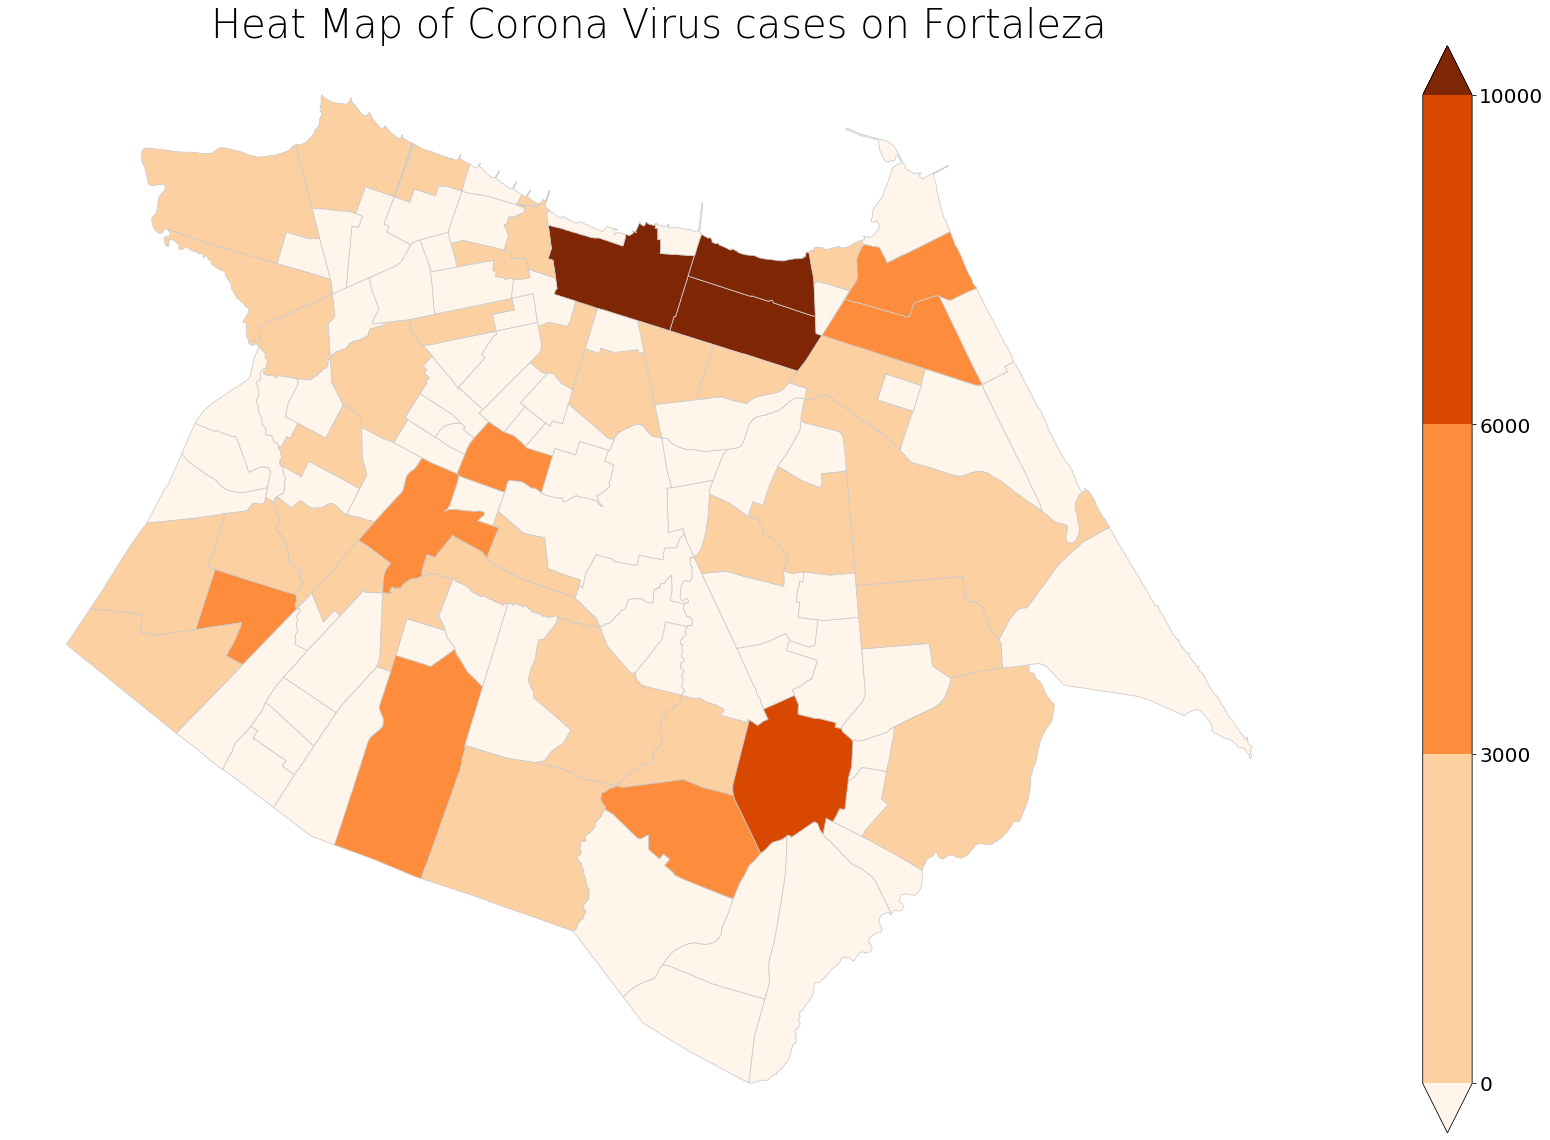

In [98]:
plot_fortaleza_heat_map(df)

# Second Fortnight

In [99]:
df = readDB('2_Data_27_03','2021_04_27')

In [100]:
df = organize_table(df)

In [101]:
df = define_neighborhoods(df)

In [102]:
df = get_positive(df)

<ipython-input-82-6730a29a1336>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fortaleza_positive['valid'] = 1


In [103]:
df = get_case(df)

In [104]:
df = merge_geometry(df)

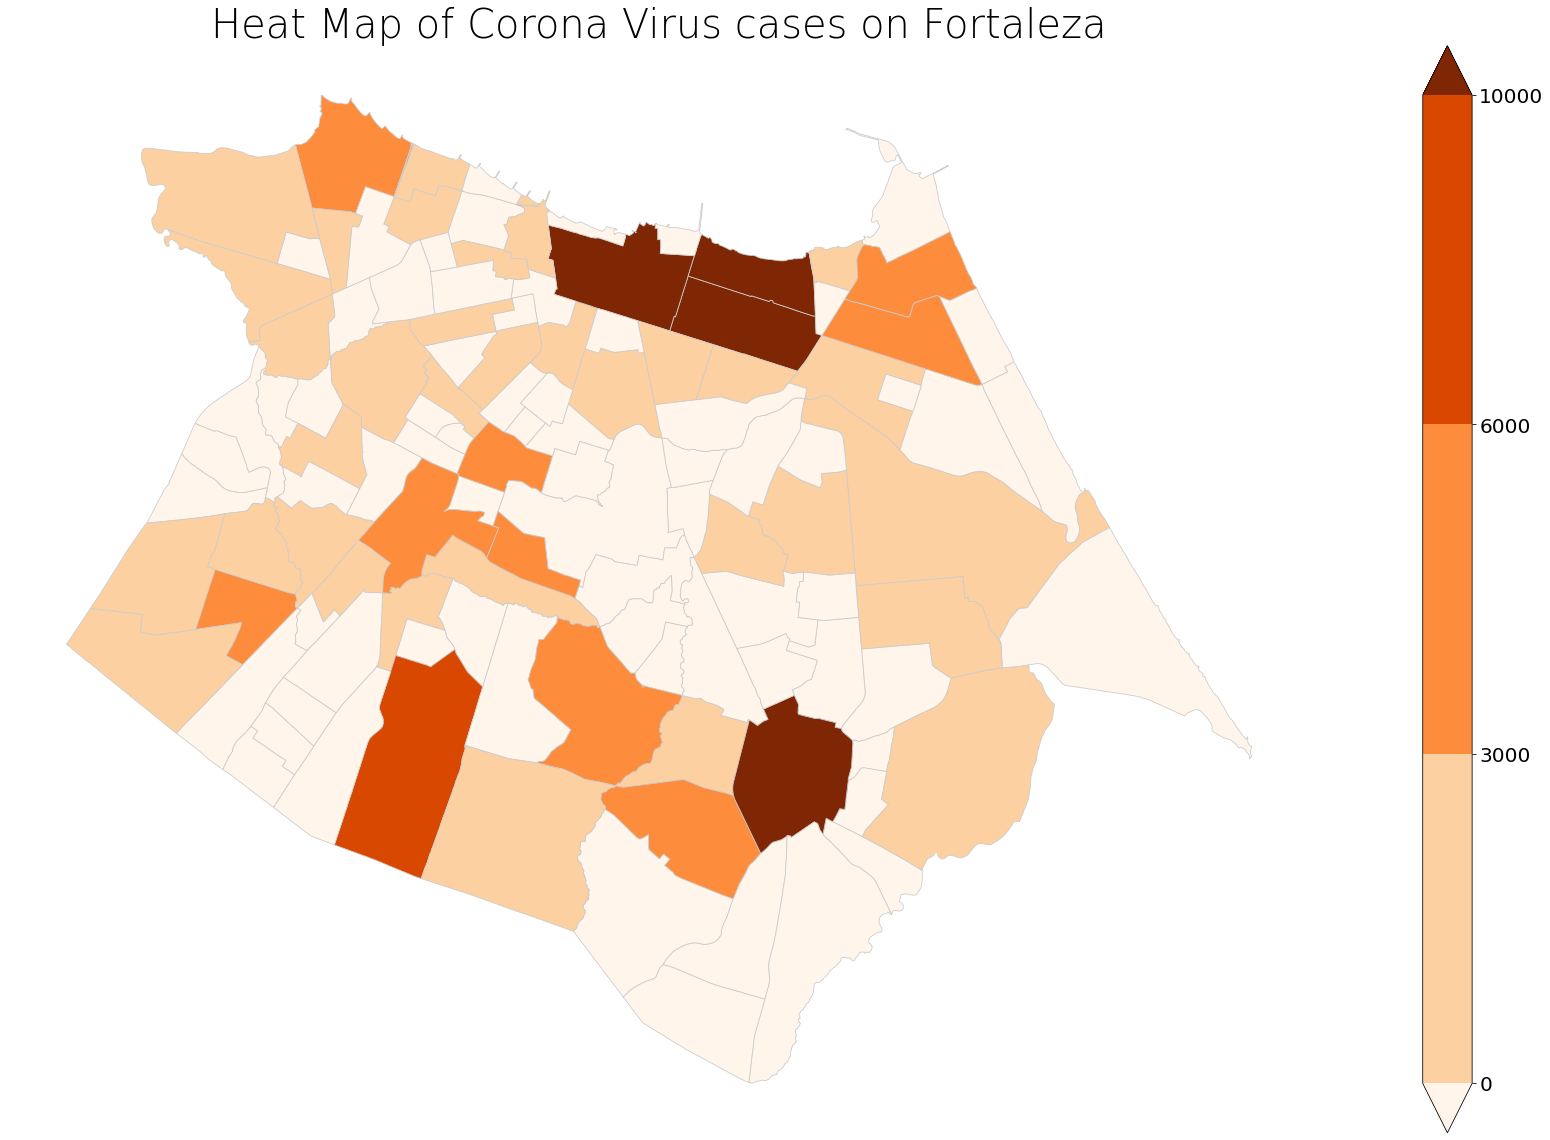

In [105]:
plot_fortaleza_heat_map(df)

# Third Fortnight

<ipython-input-82-6730a29a1336>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fortaleza_positive['valid'] = 1


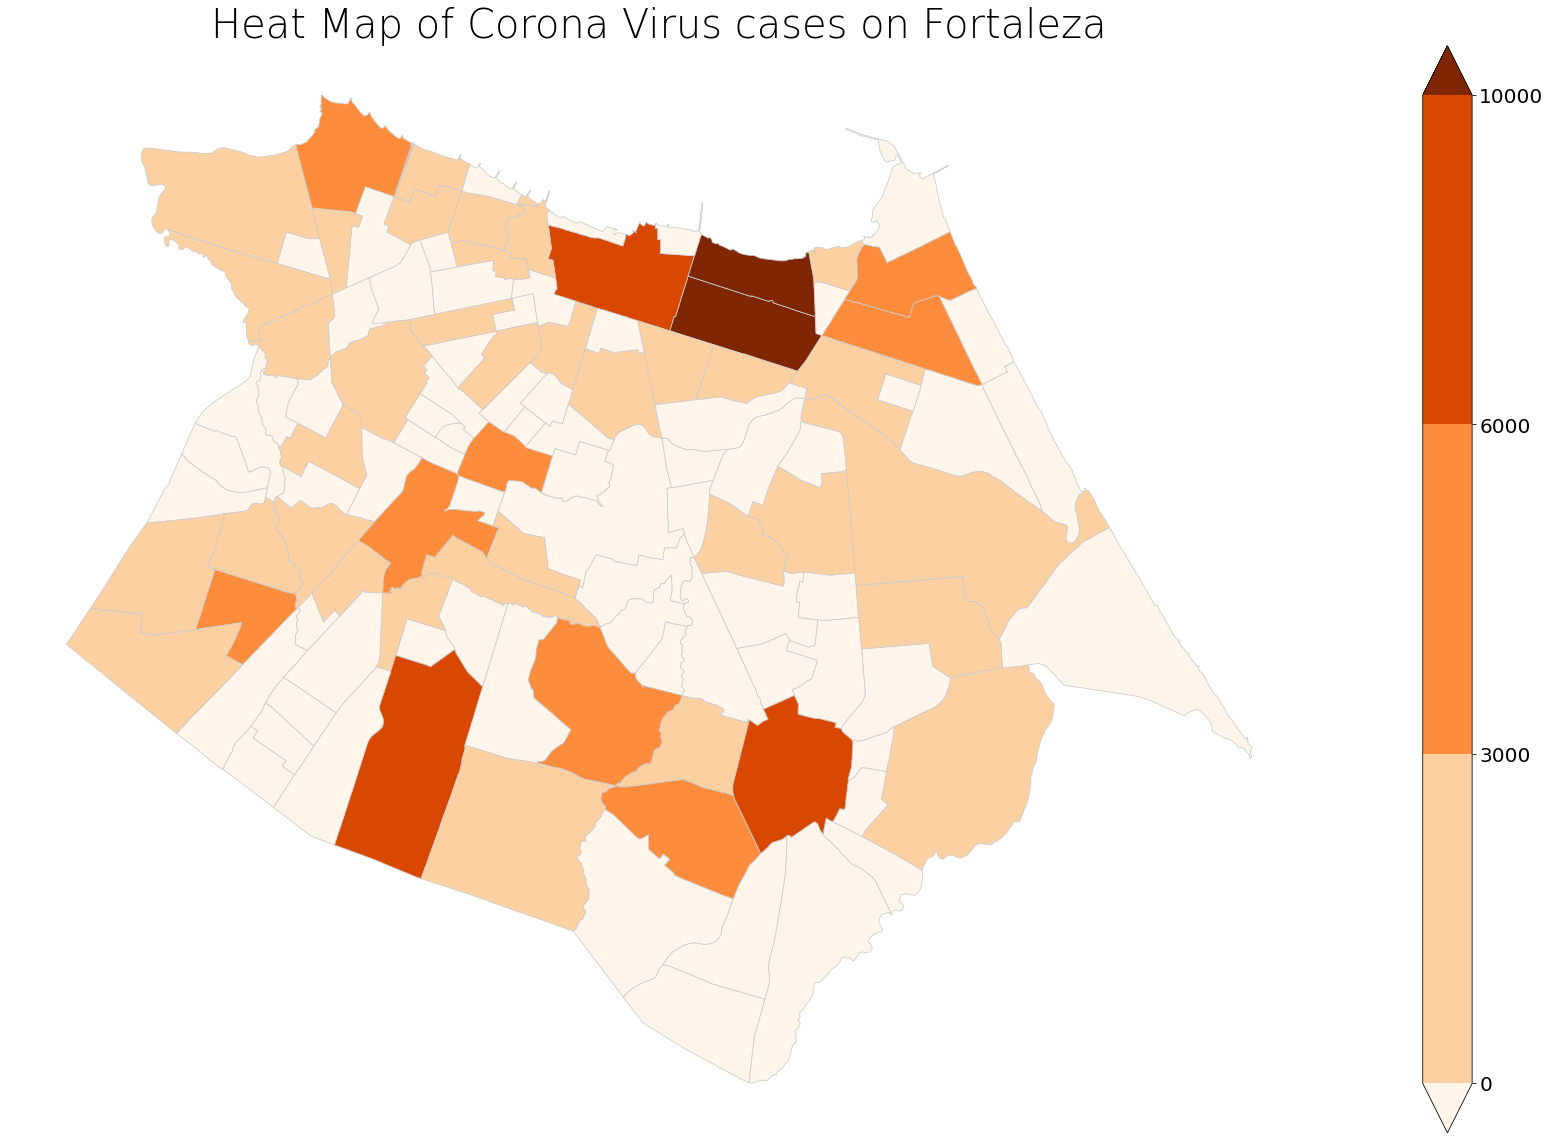

In [106]:
df = readDB('3_Data_12_05','2021_05_12')
df = organize_table(df)
df = define_neighborhoods(df)
df = get_positive(df)
df = get_case(df)
df = merge_geometry(df)
plot_fortaleza_heat_map(df)

# Fourth Fortnight

<ipython-input-82-6730a29a1336>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fortaleza_positive['valid'] = 1


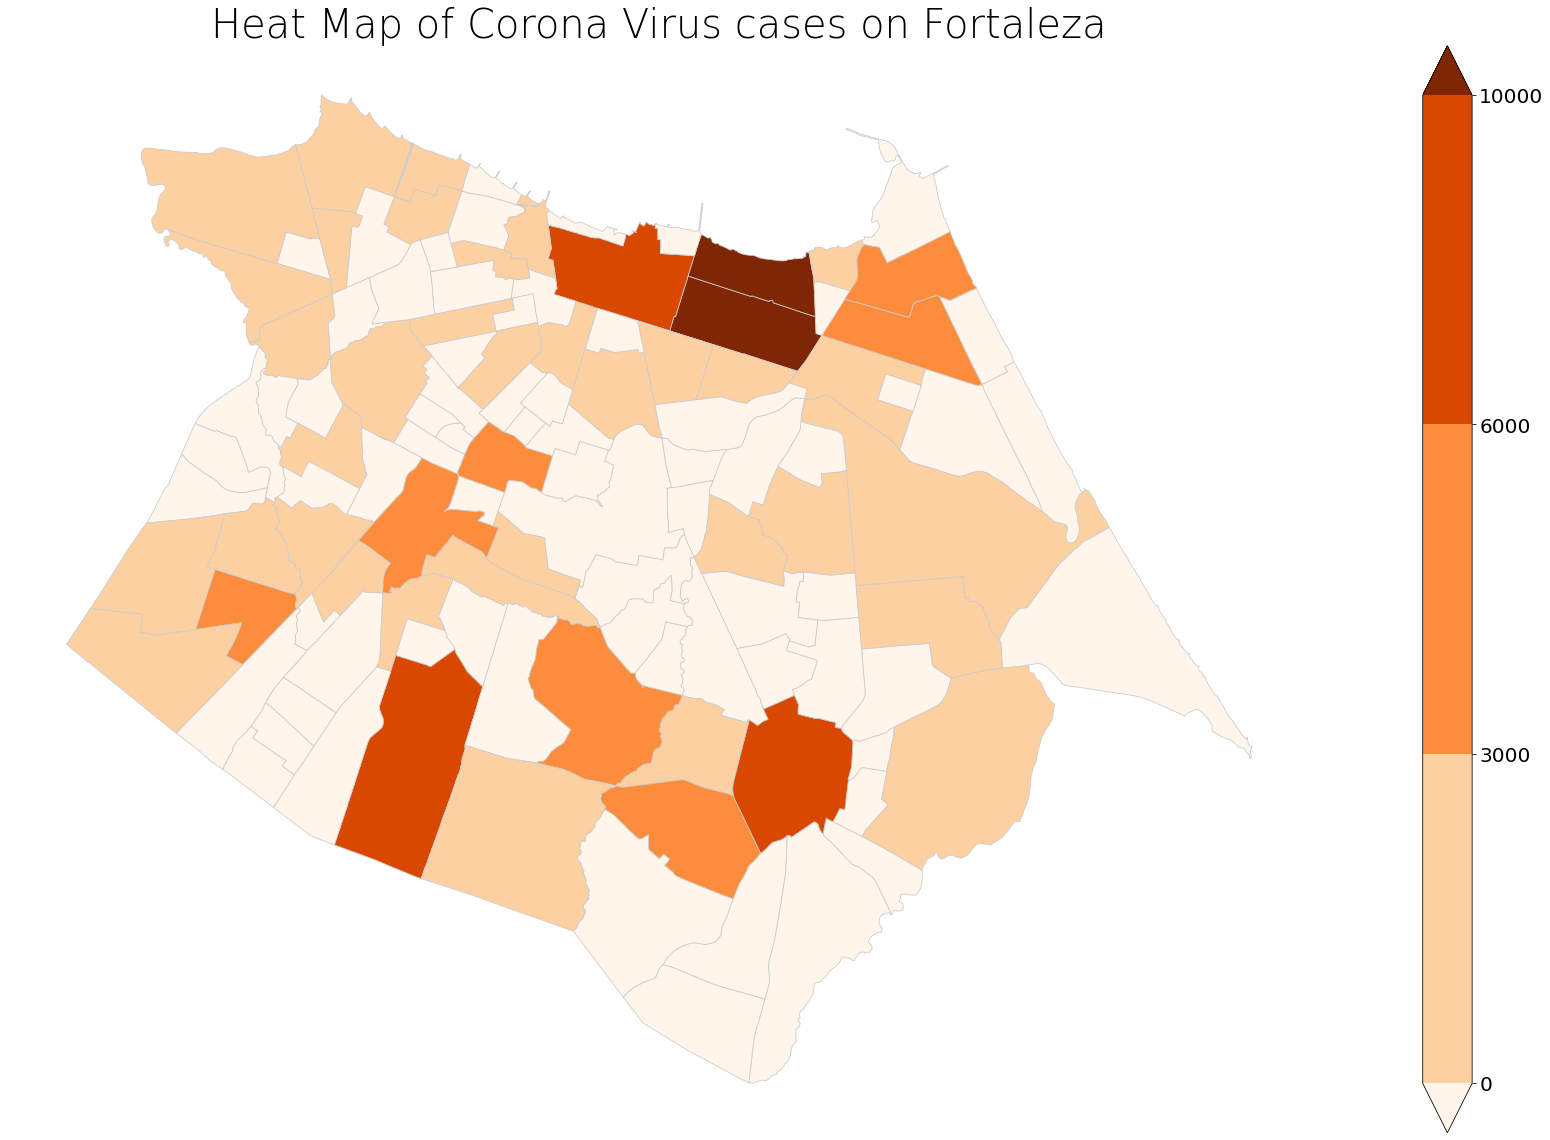

In [107]:
df = readDB('4_Data_20_05','2021_05_20')
df = organize_table(df)
df = define_neighborhoods(df)
df = get_positive(df)
df = get_case(df)
df = merge_geometry(df)
plot_fortaleza_heat_map(df)

# Fifth Fortnight

<ipython-input-82-6730a29a1336>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fortaleza_positive['valid'] = 1


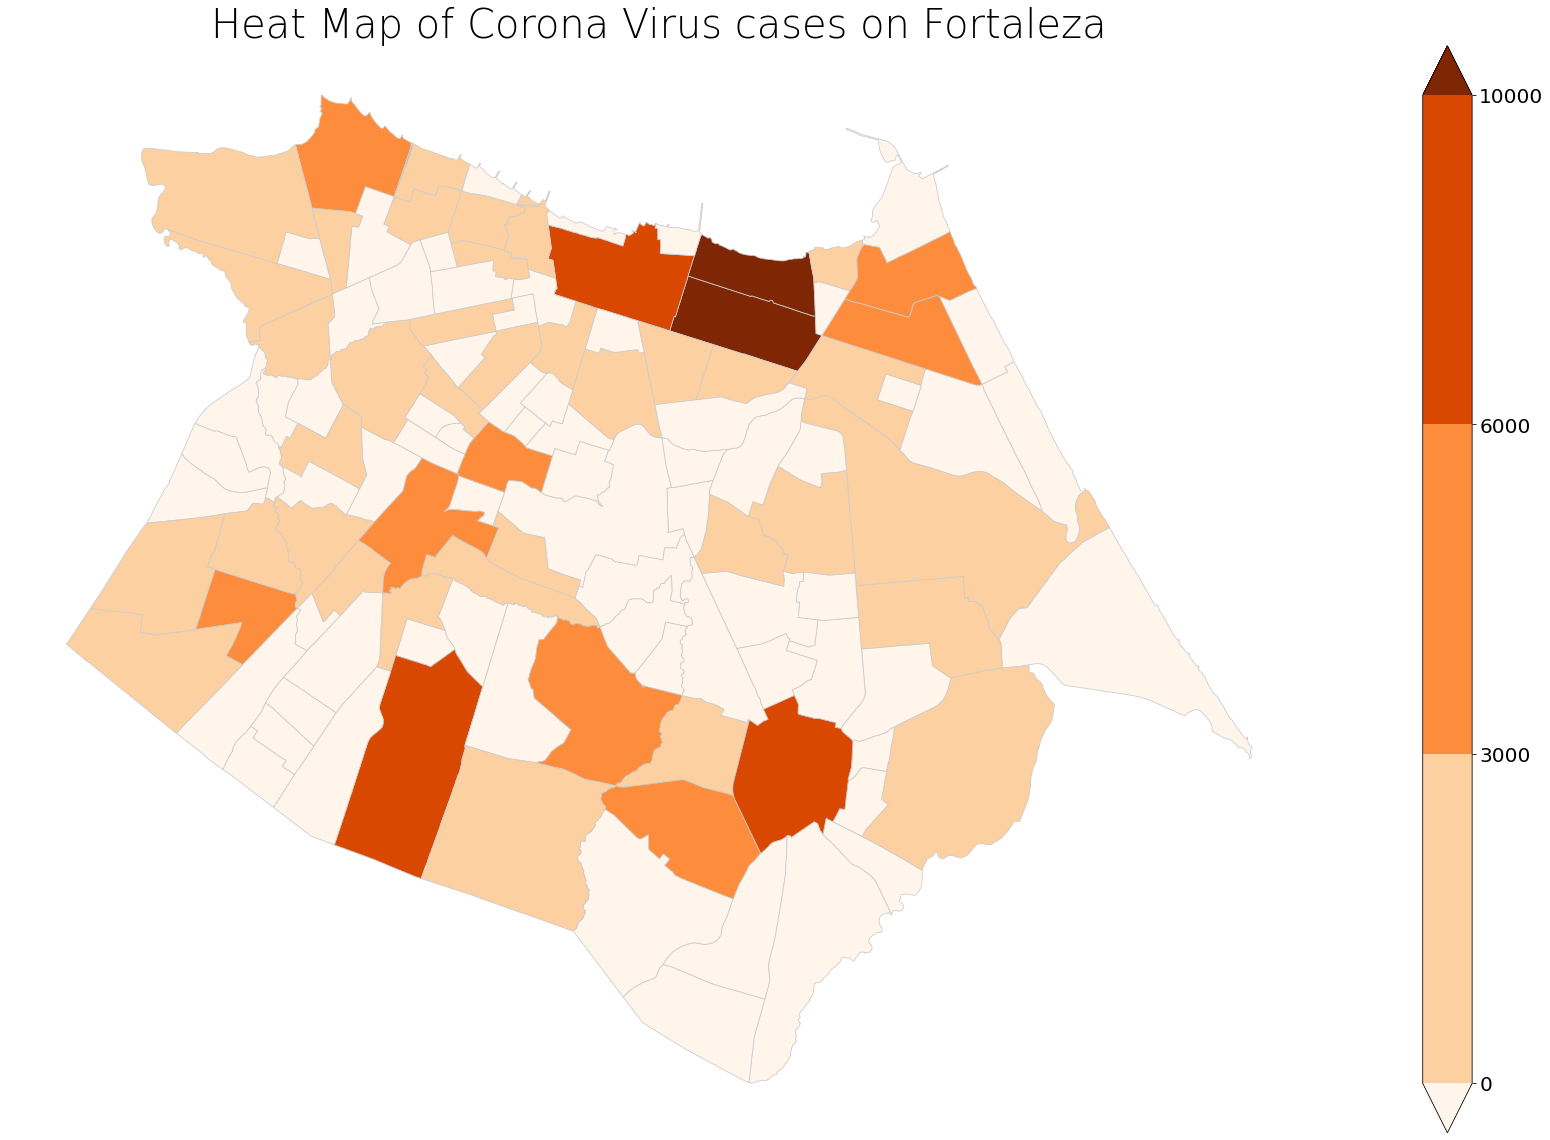

In [108]:
df = readDB('5_Data_01_6','2021_06_01')
df = organize_table(df)
df = define_neighborhoods(df)
df = get_positive(df)
df = get_case(df)
df = merge_geometry(df)
plot_fortaleza_heat_map(df)

# Sixth Fortnight

<ipython-input-82-6730a29a1336>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fortaleza_positive['valid'] = 1


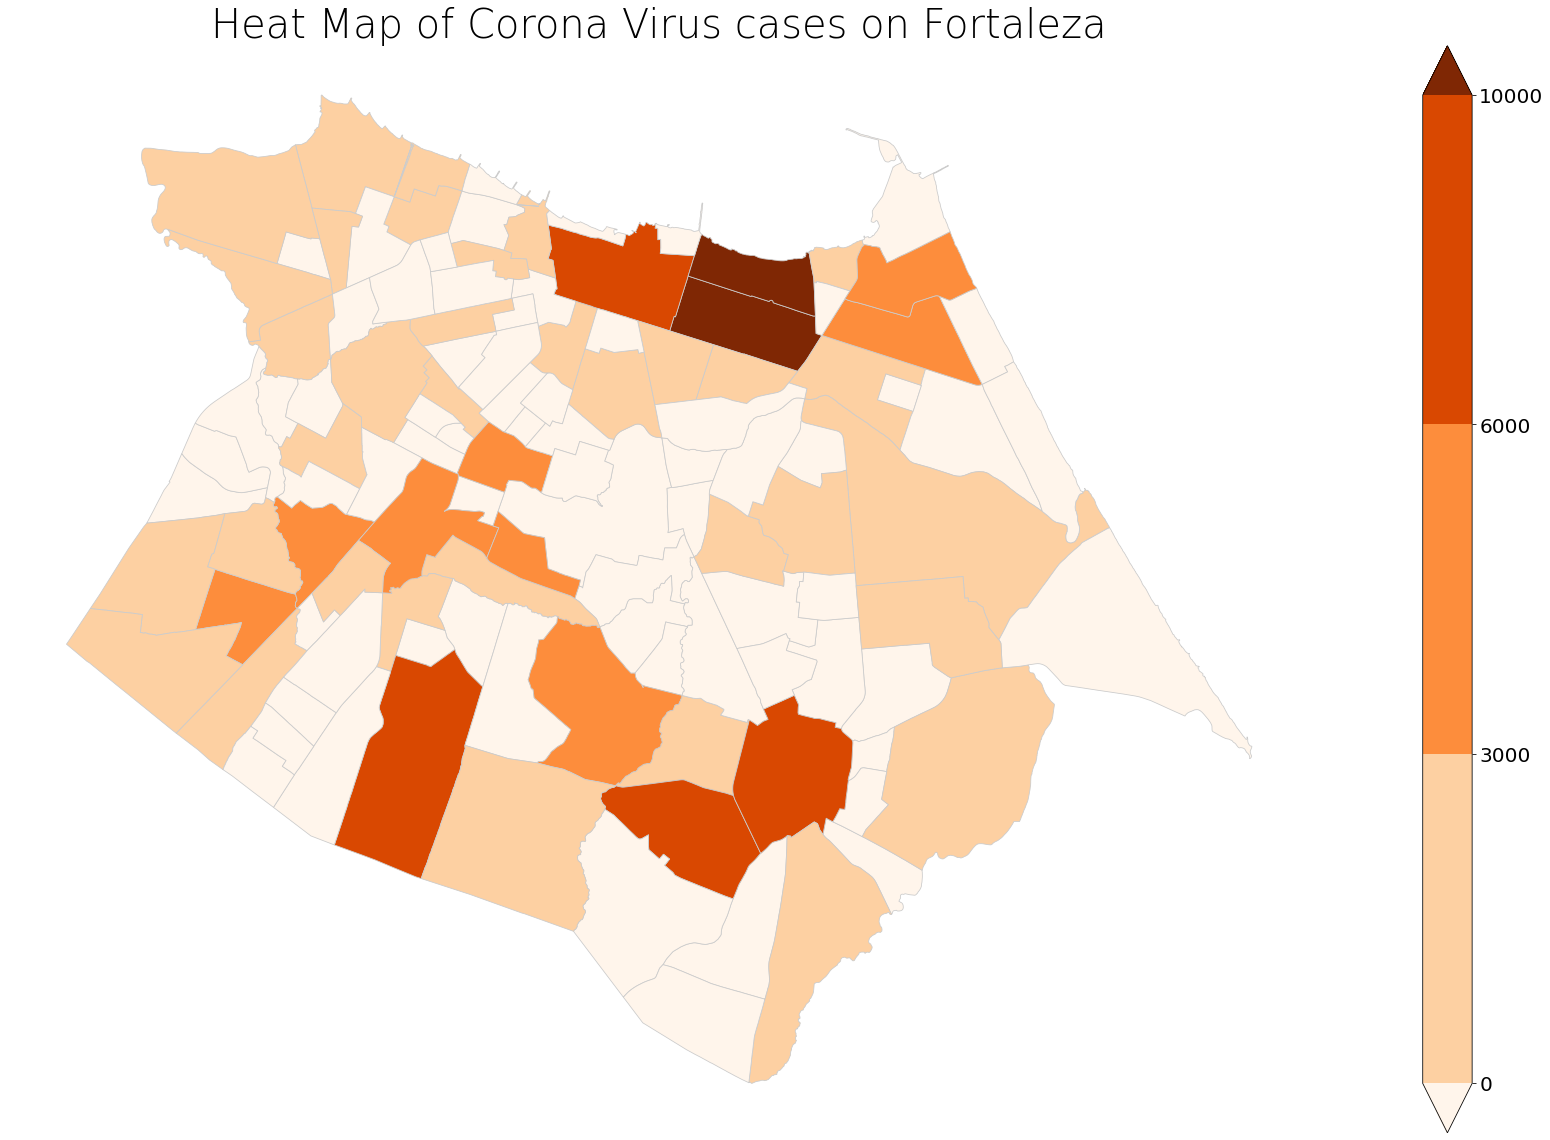

In [109]:
df = readDB('6_Data_17_06','2021_06_17')
df = organize_table(df)
df = define_neighborhoods(df)
df = get_positive(df)
df = get_case(df)
df = merge_geometry(df)
plot_fortaleza_heat_map(df)

# Seventh Fortnight

<ipython-input-82-6730a29a1336>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fortaleza_positive['valid'] = 1


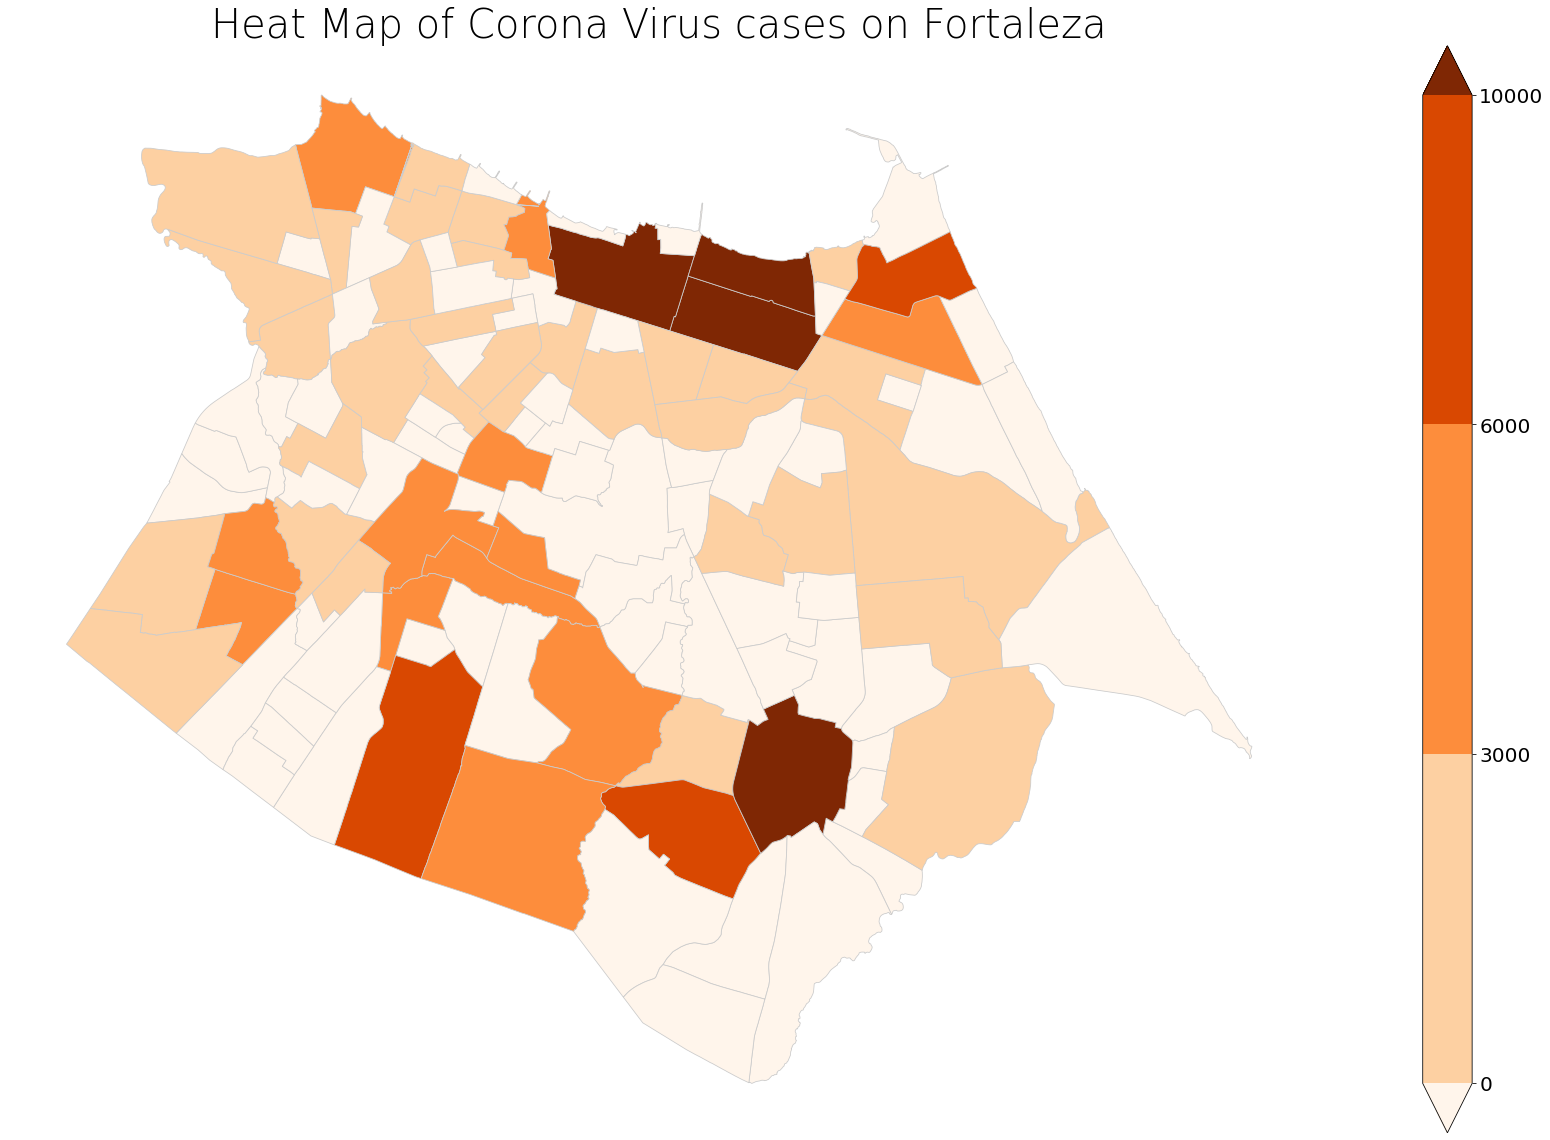

In [110]:
df = readDB('7_Data_21_06','2021_06_21')
df = organize_table(df)
df = define_neighborhoods(df)
df = get_positive(df)
df = get_case(df)
df = merge_geometry(df)
plot_fortaleza_heat_map(df)
